<a href="https://colab.research.google.com/github/Szuyingpan/Data-Programming/blob/main/Salary_Prediction_exploring_the_relationship_between_gender_and_income_equality_in_different_countries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction: exploring the relationship between gender and income equality in different countries

<a id="0"></a> <br> <a id="section_ID"></a>
 ## Contents  

1. [Aims, Objectives and Backgrounds](#1) <a id="section_ID"></a>

    [1.1 Introduction](#8)
    
    [1.2 Aims and Objective](#9)
    
    [1.3 Methodology (CW2)](#10)
    
1. [Data Preprocessing and Preparation](#2) <a id="section_ID"></a>

    [2.1 Import Modules](#11) <a id="section_ID"></a>
    
    [2.2 Data Information](#12) <a id="section_ID"></a>
    
    [2.3 Exploratory Data Analysis (EDA)](#13) <a id="section_ID"></a>
    
    [2.3.1 Detect missing values](#15) <a id="section_ID"></a>
    
    [2.3.2 Handle with missing values](#16) <a id="section_ID"></a>
    
    [2.3.3 Data Visualisation](#17) <a id="section_ID"></a>

    [2.3.4 Outlier Detection](#18) <a id="section_ID"></a>
    
    [2.4 Data Pre-processing](#14) <a id="section_ID"></a>
   
    [2.4.1 Normalise dataset](#19) <a id="section_ID"></a>

1. [Modeling](#3) <a id="section_ID"></a>

    [3.1 Random Forest](#20) <a id="section_ID"></a>
   
    [3.2 XGBoost](#21)<a id="section_ID"></a>
   
    [3.3 Gradient Boosting](#22)<a id="section_ID"></a>

    [3.4 K-nearest Neighbour](#23) <a id="section_ID"></a>
   
    [3.4 Measure Algorithem Performance](#24) <a id="section_ID"></a>

    [3.4.1 ROC Curve](#25) <a id="section_ID"></a>
   

1. [Result/ Interpretation](#4) <a id="section_ID"></a>

1. [Conclusion/ Project Limitation](#5)  <a id="section_ID"></a>   

1. [References](#6)     <a id="section_ID"></a>

1. [Resources Used](#7)   <a id="section_ID"></a>    
    

<a id="1"></a>
 ## 1. Aims, Objectives and Backgrounds
<a id="8"></a>
 ### 1.1 Introduction
The final project is inspired by impactful social movements like #MeToo and #BlackLivesMatter, which have garnered global attention to issues of gender and racial inequity. Moreover, these movements have provided a platform for in-depth conversations about pay equity, prompting individuals and organizations to reassess their policies and practices. Consequently, a multitude of questions arises, including why women have been earning less than men for decades and why progress toward achieving pay equality has been slow. Efforts to promote pay equity involve various strategies such as policy changes, cultural shifts, challenges to social norms, considerations of job characteristics, and awareness campaigns aimed at challenging stereotypes, biases, and discriminatory practices. The dataset utilized in this project, compiled by Barry Becker from the 1994 Census database, encompasses 15 variables. Open to the public for research and analysis, the dataset explores factors such as age, education, race, marital status, relationship status, work class, occupation, and more. The dataset comprises 32,561 individuals, with males accounting for 66.9% and females representing 33.1% of the total population.

<a id="9"></a> <br>
 ### 1.2 Aims and objectives

 [Back to the top](#0)<a id="0"></a>

In the final project, my primary objective is to thoroughly investigate all the variables that could potentially influence the target variables, which are gender (sex) and annual salary. My approach will utilise data science techniques to train the datasets that can predict whether an individual's income exceeds 50K annually.

I aim to explore the multifaceted relationships among these variables to identify trends and insights that may have an impact on an individual's income. Within the dataset, salary has been categorized into two classes, namely, >50K or <=50K, which is a simplified representation of an individual's wealth. However, it's worth acknowledging that wealth and income can be much more complex than this binary classification suggests.

One noteworthy aspect to consider is the composition of the dataset's population. The skewed distribution between male and female is evident, and if we were to use the entire gender-based data to train our predictive model, there could be a potential bias in the results. To address this, we will employ target variables (>50K or <=50K) to evaluate any gender-based bias in the EDA process.


<a id="10"></a>
 ### 1.3 Methodology

 [Back to the top](#0)<a id="0"></a>

The overall methodology for this project follows a structured approach to ensure a comprehensive understanding of the data and effective predictive modeling. Initially, the process commences with a thorough examination of the data, which includes inspecting data information, understanding the dataset's variables, and assessing its shape and data types. This foundational step sets the stage for further analysis.

The next phase involves Exploratory Data Analysis (EDA), which entails identifying and addressing potential data issues. This includes examining the dataset for missing values and implementing the mode for filling them. To make the data more accessible and comprehensible to the audience, various graphs and visualizations are employed to aid in the interpretation and comparison of information. Simultaneously, I explore the correlation between different variables to identify less important and correlated variables for model training. Additionally, the presence of outliers is examined to mitigate data bias.

Next, I categorize variables into binary, categorical, and numerical, then normalize all values. For categorical data, LabelEncoder is applied to assign numerical labels to categorical variables, making them amenable to machine learning modules. Furthermore, for binary variables such as salary and gender (sex), one-hot encoding is employed to transform them into a format that machine learning models can effectively utilize. Subsequently, I use a heatmap to assess the correlation between different variables and drop one column with negative correlation for training. Before splitting the datasets into training and test sets, I use SMOTE to check data balance and shape for preparation.

Finally, I create four models— Random Forest, XGBoost, Gradient Boosting, and K-nearest Neighbour—to train and test the datasets. Using the ROC curve, I check the AUC score and choose the best model.

<a id="2"></a>
## 2. Data Preprocessing and Preparation
<a id="11"></a>
 ### 2.1 Import Modules

[Back to the top](#0)<a id="0"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

<a id="12"></a>
 ### 2.2 Data Information

 [Back to the top](#0)<a id="0"></a>

In [ ]:
# Import dataset
df = pd.read_csv('salary.csv')
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Look at the features' data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# There is no inappropriate data types

In [ ]:
df.shape

(32561, 15)

In [ ]:
# Check the 15 features
Col = df.columns.to_list()
Col

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

 <a id="13"></a>
 ### 2.3 Exploratory Data Analysis ( EDA)
  <a id="15"></a>
 #### 2.3.1 Detect missing values

 [Back to the top](#0)<a id="0"></a>

In [ ]:
# Number of uniques values in dataframe

#pd.DataFrame({'': df.nunique().index , 'Number of unique values':  df.nunique().values})

#show unique values for all columns
for col in df.columns.values:
  print(col, end="\n\n")

  print(df[col].unique(), end="\n\n ***********************************\n\n")


age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 ***********************************

workclass

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 ***********************************

fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]

 ***********************************

education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 ***********************************

education-num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 ***********************************

marital-status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF

In [ ]:
# Data type exploration

df.select_dtypes(exclude=['object', 'category']).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
# Total features are 15. 6 features of type 'numeric'and 9 features of type 'object.'

In [ ]:
# Detect any missing values

df.isnull().all()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

It shows non missing values here. However, I will explore the data that isn't shown with isnull() function.
Look into each categorical feature one-by-one.

In [ ]:
df['workclass'].unique()


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
# Replace '?' by NaN
df['workclass'].replace(' ?', np.nan, inplace=True)

In [ ]:
# Check education feature
df['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [ ]:
# Check marital-status feature
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
# There is no missing values in marital-status.

In [ ]:
# Check occupation feature
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
# Replace ' ?' by Nan
df['occupation'].replace(' ?', np.nan, inplace=True)

In [ ]:
# Check relationship feature
df['relationship'].value_counts()

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [ ]:
# There is no missing values in relationship.

In [ ]:
# Check race feature

df['race'].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [ ]:
# There is no missing values in race.

In [ ]:
# Check sex feature

df['sex'].value_counts()

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [ ]:
# There is no missing value in sex.

In [ ]:
# Check native-country feature
df['native-country'].value_counts(sort=True)

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [ ]:
# replace ' ?' by NaN
df['native-country'].replace(' ?', np.nan, inplace=True)

In [ ]:
# "?" has been replaced to "nan"
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df['salary'].value_counts()

salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

<a id="16"></a>
 #### 2.3.2 Handle with missing values

In [ ]:
# Cleaning all the spaces from object date type

df= df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/hp/45b34q497yb03l6tn8htgp5w0000gn/T/ipykernel_19851/4001370547.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df= df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [ ]:
# Display the rows where 'workclass' is NaN
rows_workclass_na = df[df['workclass'].isnull()]
rows_workclass_na.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


From the table provided, it is evident that when the 'workclass' feature is absent, the 'occupation' feature is also absent. Consequently, the absence of 'occupation' appears to occur randomly. To address this issue, the following approach will be employed:

First, we will populate the missing 'workclass' values with its mode (the most frequent value). Subsequently, we will fill in the missing 'occupation' values with the value that has the highest frequency within the context of the 'workclass' mode.

In [ ]:
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [ ]:
# Occupations where 'workclass' is ' Private'
temp = df['occupation'][df['workclass']=='Private']

temp.mode()

0    Craft-repair
Name: occupation, dtype: object

In [ ]:
# Fill 'workclass' missing values with ' Private' and 'occupation' missing values with 'Craft-repair'
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['workclass'].isnull().sum()

0

In [ ]:
# Check the whitespaces has been removed
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['occupation'].fillna('Craft-repair', inplace=True)

In [ ]:
df['occupation'].isnull().sum()

0

In [ ]:
df['native-country'].mode()

0    United-States
Name: native-country, dtype: object

In [ ]:
df['native-country'].fillna('United-States', inplace=True)

In [ ]:
df['native-country'].isnull().sum()

0

In [ ]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
# Check the native-country has been removed
#df['native-country'].unique()

In [ ]:
# Check again to detect any missing values

columns_list = df.columns.tolist()

values = []
for i in columns_list :
    num = round(df[df[i] == '?'].shape[0] * 100 / df.shape[0], 2)
    values.append(num)

result = pd.DataFrame({'feature': columns_list, 'num_missing_data': values})
print(result)

           feature  num_missing_data
0              age               0.0
1        workclass               0.0
2           fnlwgt               0.0
3        education               0.0
4    education-num               0.0
5   marital-status               0.0
6       occupation               0.0
7     relationship               0.0
8             race               0.0
9              sex               0.0
10    capital-gain               0.0
11    capital-loss               0.0
12  hours-per-week               0.0
13  native-country               0.0
14          salary               0.0


 <a id="17"></a>
 #### 2.3.3 Data Visualisation

 [Back to the top](#0)<a id="0"></a>

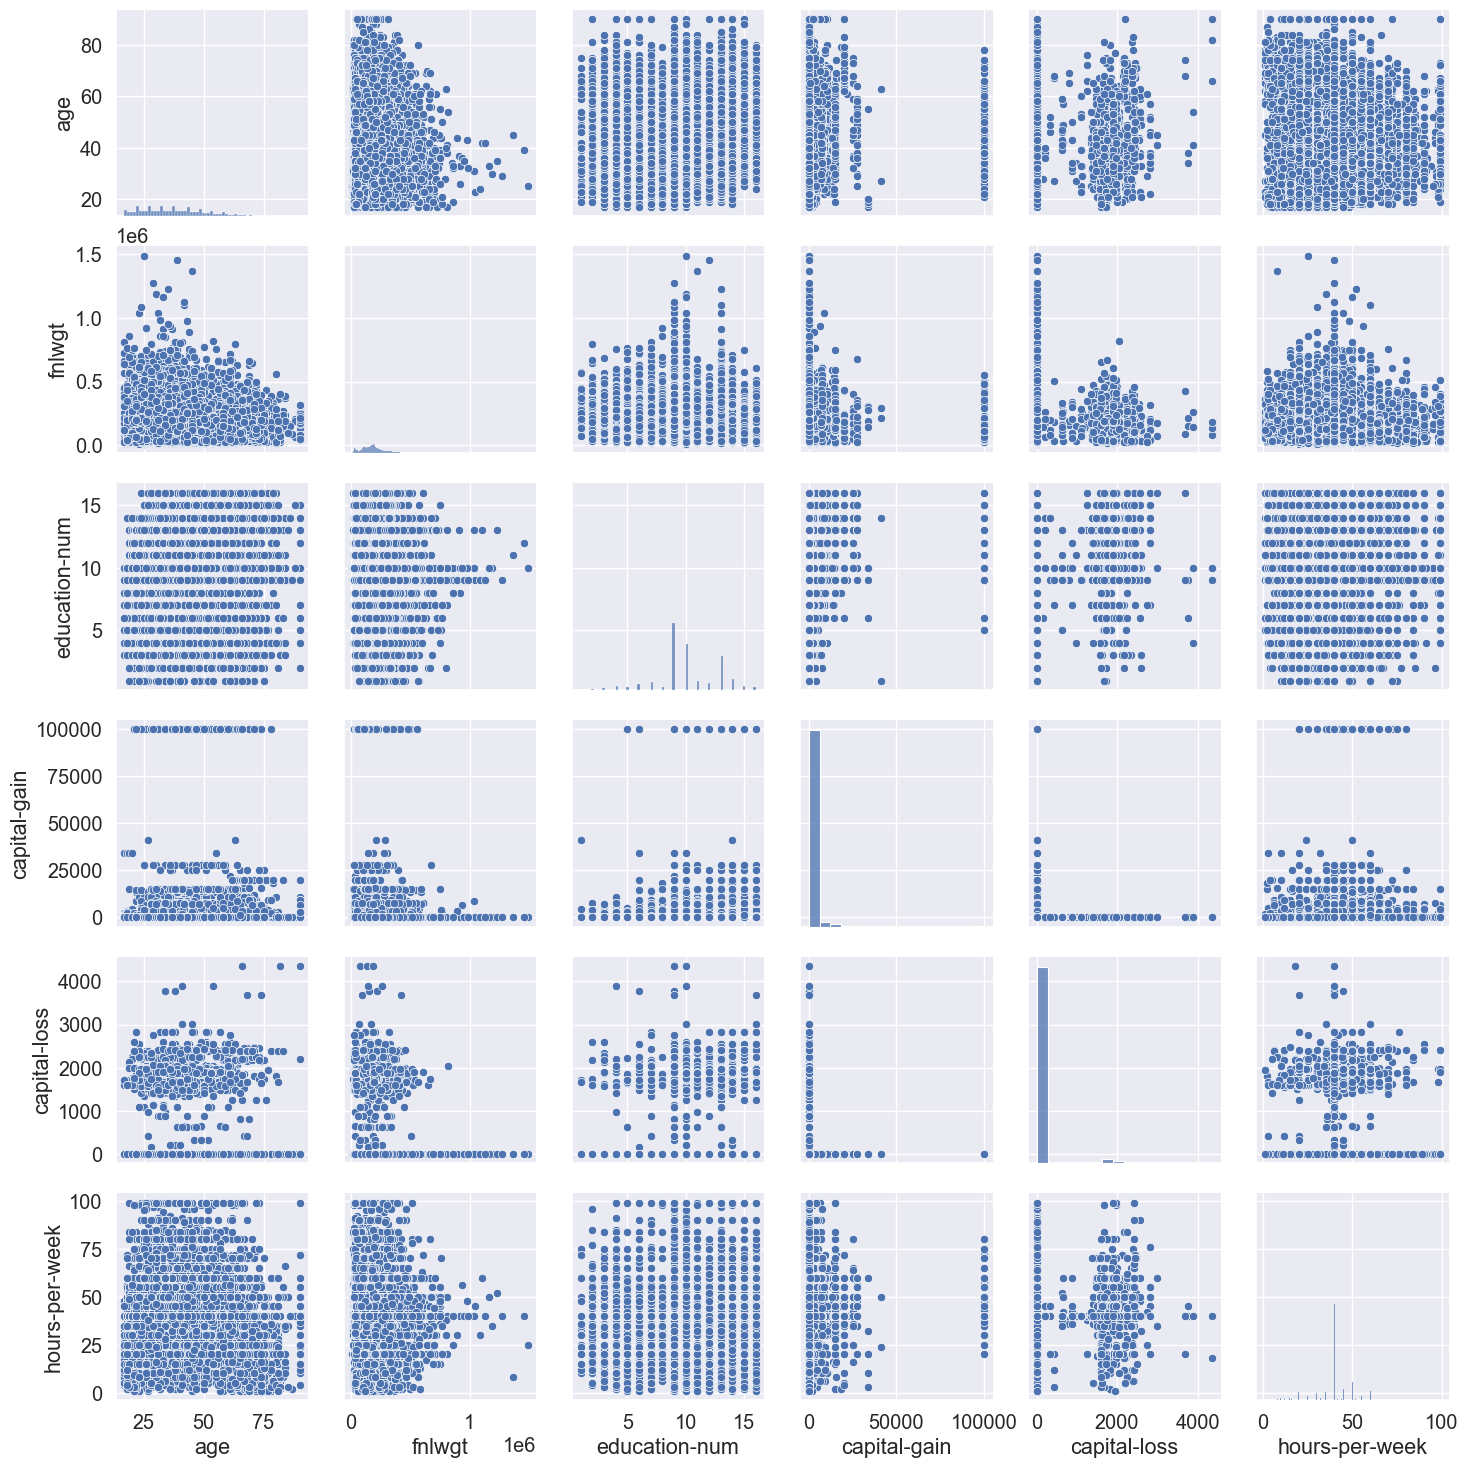

In [ ]:
sns.pairplot(df)

We can take a glace the values distribute in different categorical variables.

Text(0.5, 1.0, 'Age variation depending on hours-per-week')

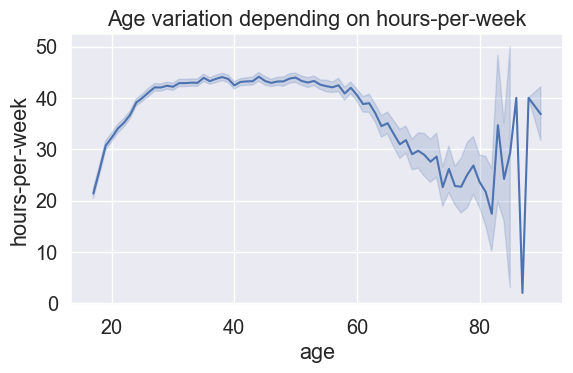

In [ ]:
# See the lineplot between age and work hours per week
plt.figure(figsize=(6,4))
sns.lineplot(data=df,x='age',y='hours-per-week')
plt.title('Age variation depending on hours-per-week')

It is interesting to observe a notable rise in working hours from the age of 20 to 30. Between the ages of 30 and 60, the working hours stabilize at around 45 hours. Beyond the age of 60, there is a gradual decline, with a particularly dramatic fluctuation from ages 80 to 90. At age 87, working hours sharply decrease to approximately 3 hours, followed by a sharp peak at 40 hours, and subsequent decrease.

Text(0.5, 1.0, 'Marital-status VS Occupation')

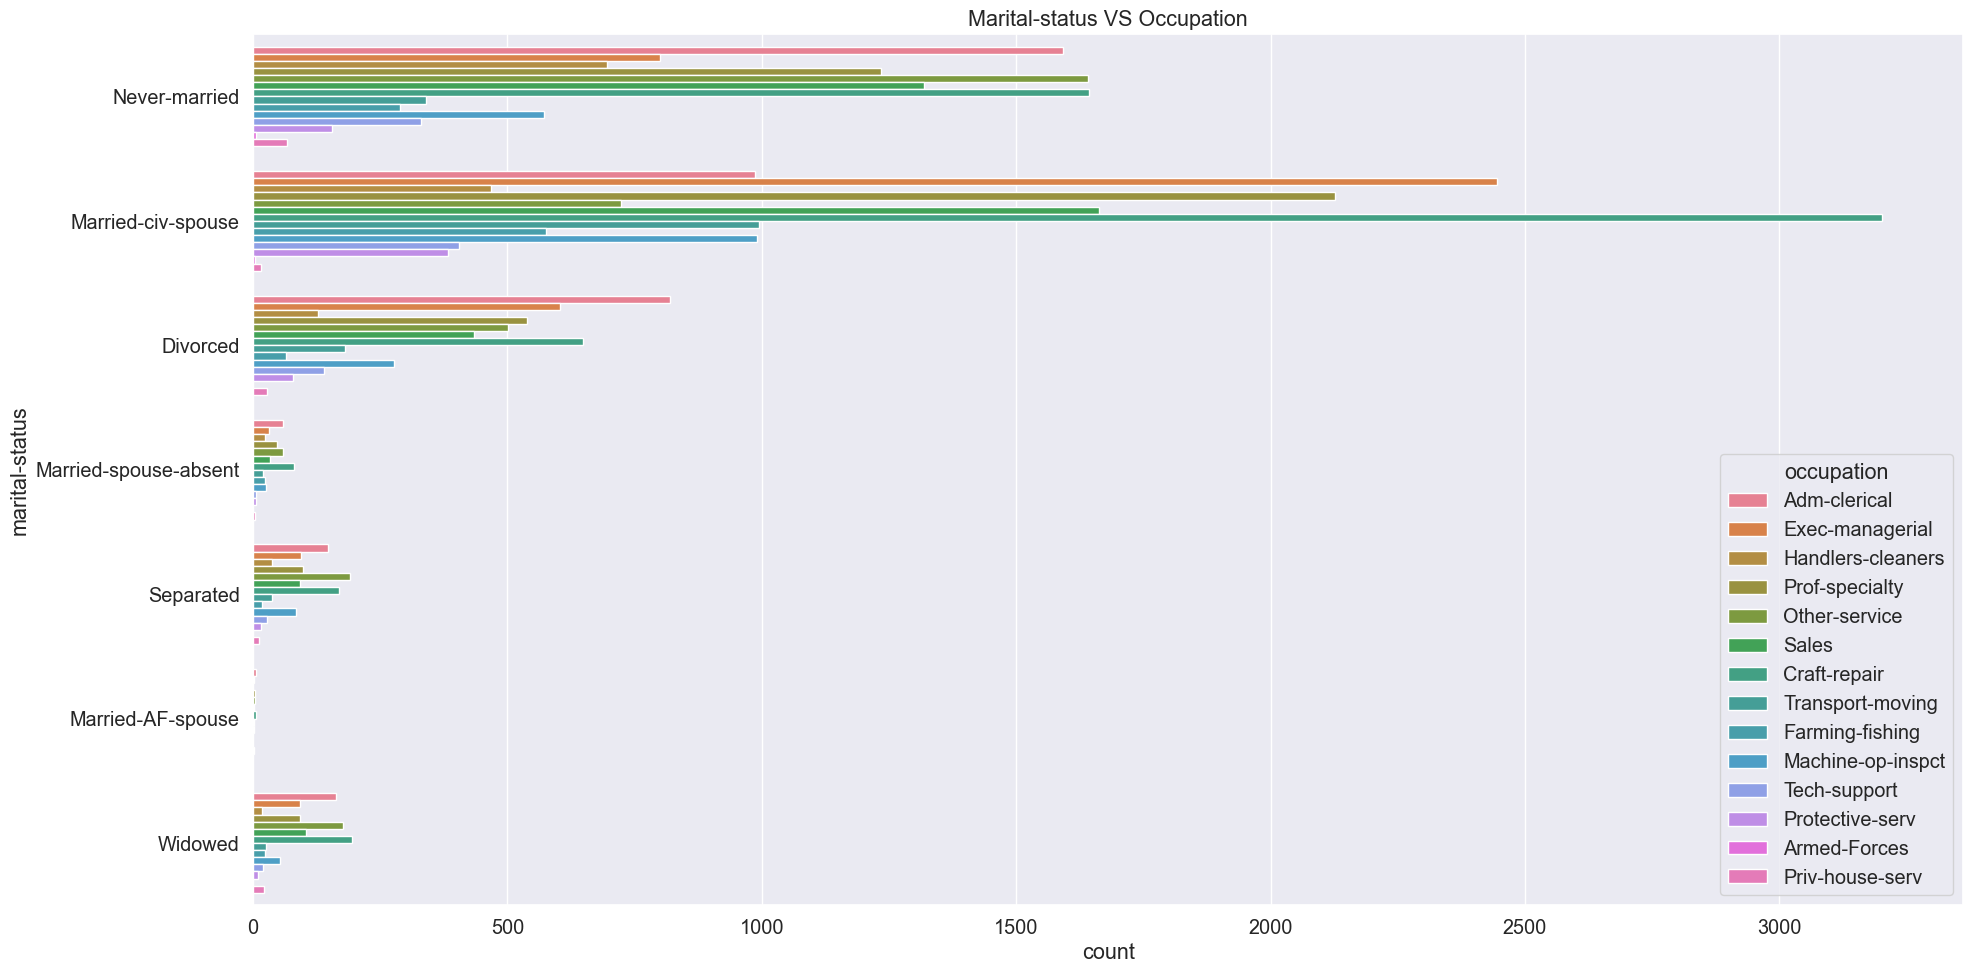

In [ ]:
# Marital-status VS occuption

plt.figure(figsize=(20, 10))
ax = sns.countplot(data=df,y='marital-status', hue='occupation')
sns.set_palette('colorblind')
ax.set_title('Marital-status VS Occupation')

Text(0.5, 1.0, 'Native-country VS Salary')

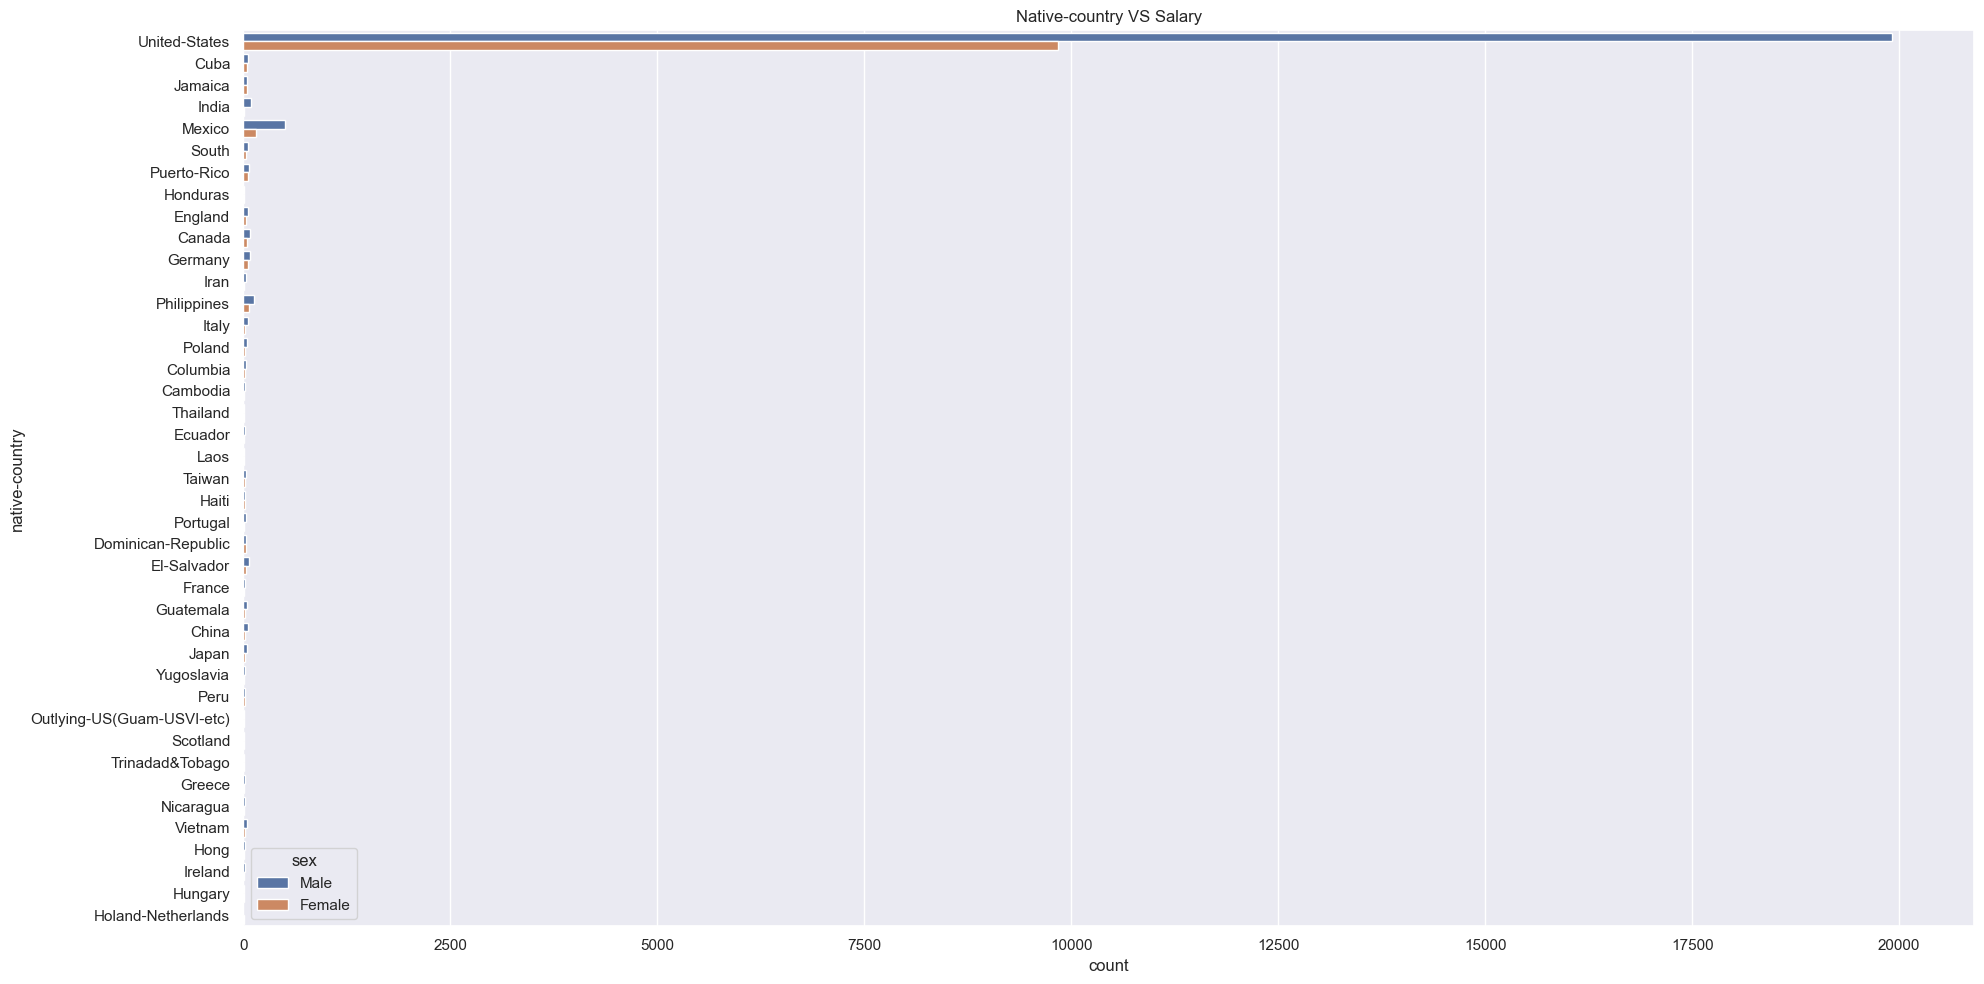

In [ ]:
#Native-country VS gender

# set seaborn style
sns.set_theme()

plt.figure(figsize=(20, 10))
ax = sns.countplot(data=df,y='native-country', hue='sex')
sns.set_palette('Accent_r')
ax.set_title('Native-country VS Salary')

The dataset demonstrates that the United States occupies the majority of countries, and males is the highest proportion. However, it also reveals a potential bias if we aim to derive results from more diverse countries.

In [ ]:
# That see the dataframe between the US and NonUS
## We'll make two separate dataframes for native country feature, for use in visualisations.

US = df[df['native-country'] == 'United-States']
NonUS = df[df['native-country'] != 'United-States']

print('US', US.shape)
print('NonUS', NonUS.shape)

US (29753, 15)
NonUS (2808, 15)


/var/folders/hp/45b34q497yb03l6tn8htgp5w0000gn/T/ipykernel_19851/563485816.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="salary", data=df, palette=my_pal, order=df['salary'].value_counts().index)
/var/folders/hp/45b34q497yb03l6tn8htgp5w0000gn/T/ipykernel_19851/563485816.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="salary", data=US, palette=my_pal, order=df['salary'].value_counts().index)
/var/folders/hp/45b34q497yb03l6tn8htgp5w0000gn/T/ipykernel_19851/563485816.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = 

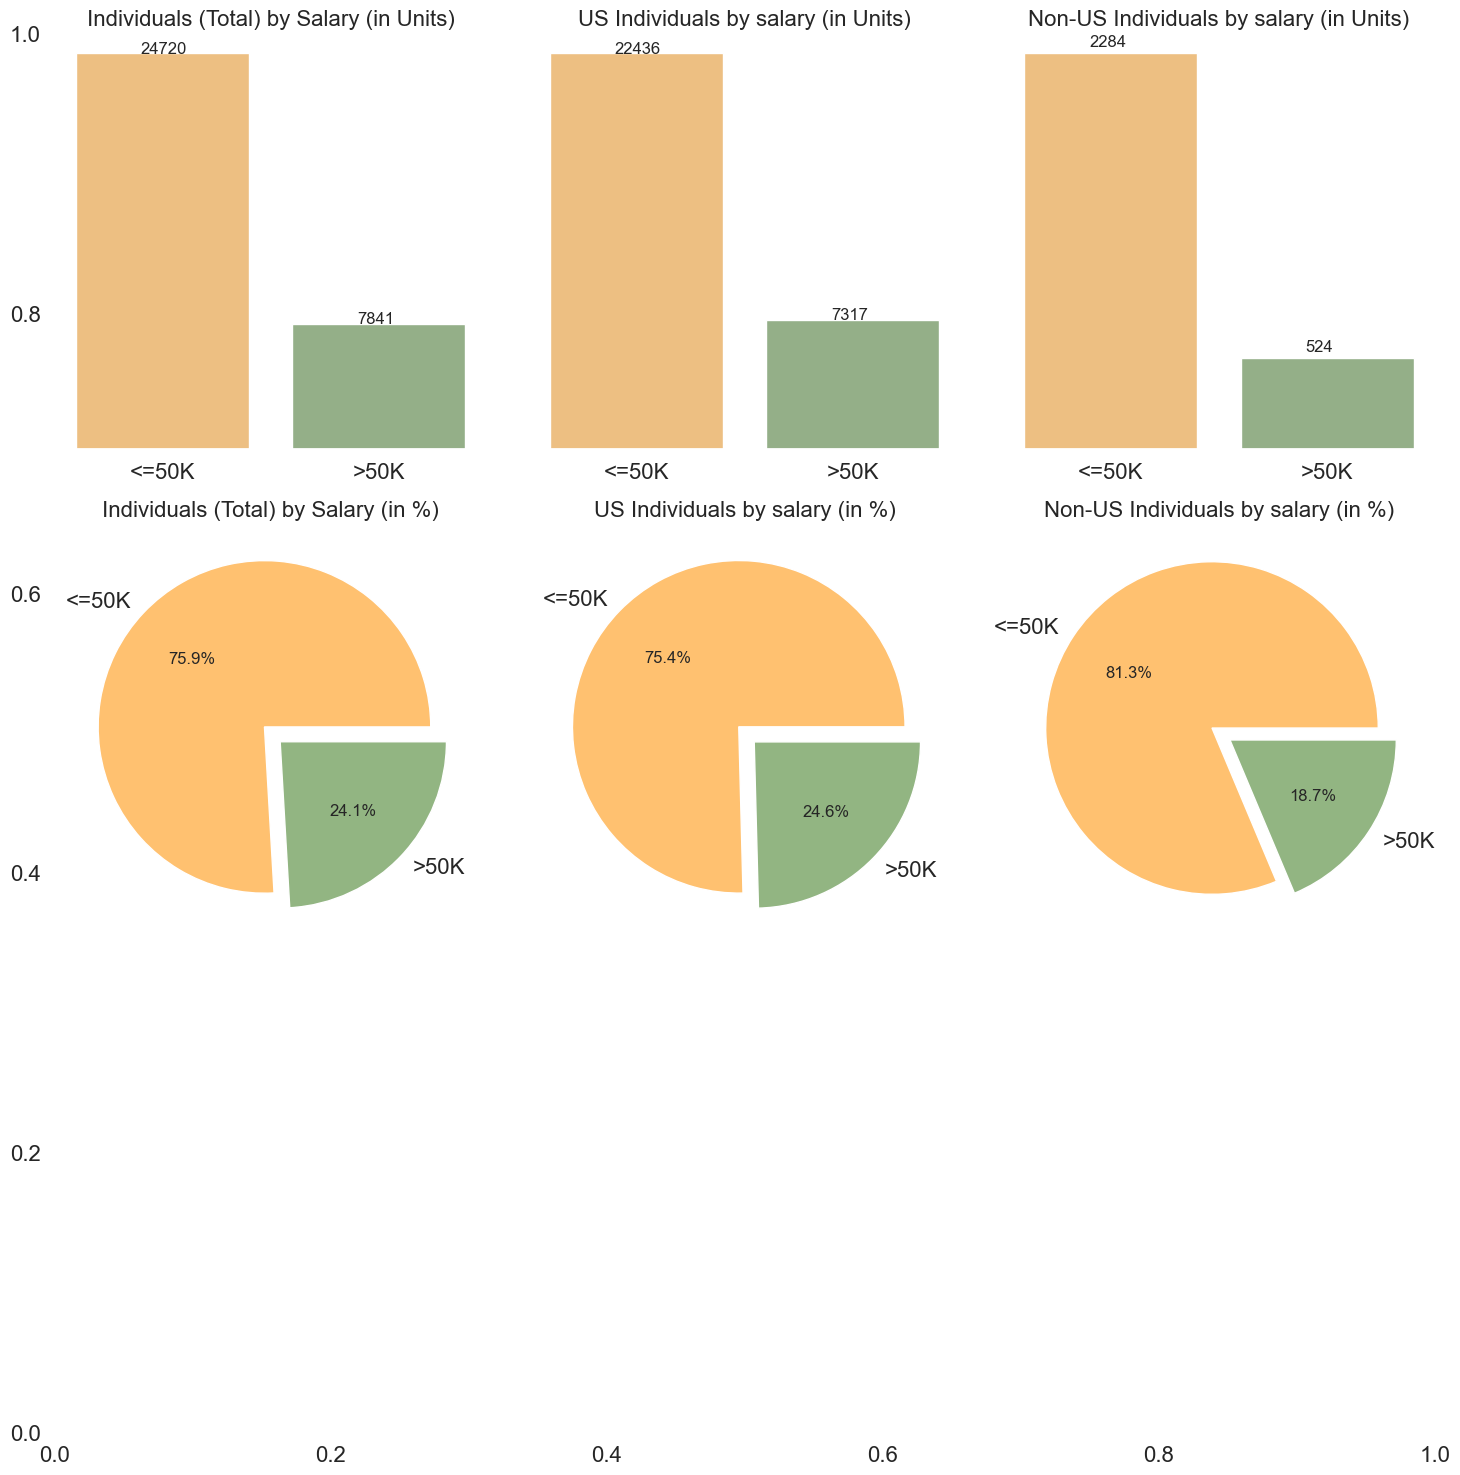

In [ ]:
# Look into the salary (the target variable in our dataset) with US vs NonUs people

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':16,'ytick.labelsize':16, 'figure.autolayout':True})
my_pal = ('#ffc170','#92b582','#e5ff70', '#596911', '#45782f','#1cba80', '#1ca2ba','#377dcc','#9155c9')
my_xpl = [0.05, 0.08]

plt.subplots(figsize=(15,15))

## Total Individuals by Salary (in Units)
plt.subplot(3,3,1)
plt.title('Individuals (Total) by Salary (in Units)', fontsize=16)
ax = sns.countplot(x="salary", data=df, palette=my_pal, order=df['salary'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

## US Individuals by Salary (in Units)
plt.subplot(3,3,2)
plt.title('US Individuals by salary (in Units)', fontsize=16)
ax = sns.countplot(x="salary", data=US, palette=my_pal, order=df['salary'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

## Non-US Individuals by Salary (in Units)
plt.subplot(3,3,3)
plt.title('Non-US Individuals by salary (in Units)', fontsize=16)
ax = sns.countplot(x="salary", data=NonUS, palette=my_pal, order=df['salary'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))

plt.xlabel(None), plt.ylabel(None), plt.yticks([])

## Total Individuals by Salary (in %)
plt.subplot(3,3,4)
plt.title('Individuals (Total) by Salary (in %)', fontsize=16)
df['salary'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')


## US Individuals by Salary (in %)
plt.subplot(3,3,5)
plt.title('US Individuals by salary (in %)', fontsize=16)
US['salary'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

## NonUS Individuals by Salary (in %)
plt.subplot(3,3,6)
plt.title('Non-US Individuals by salary (in %)', fontsize=16)
NonUS['salary'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.show()


US has higher has a higher percentage of individuals earning over 50k, standing at approximately 24%, aligning closely with the overall share

For the US individuals, regarding the salary, it is obvious to mention that the dataset is highly imbalanced as over 75% of the records belong to <=50k salary segment.

/var/folders/hp/45b34q497yb03l6tn8htgp5w0000gn/T/ipykernel_19851/136101416.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="sex", data=df, palette=my_pal, order=df['sex'].value_counts().index)


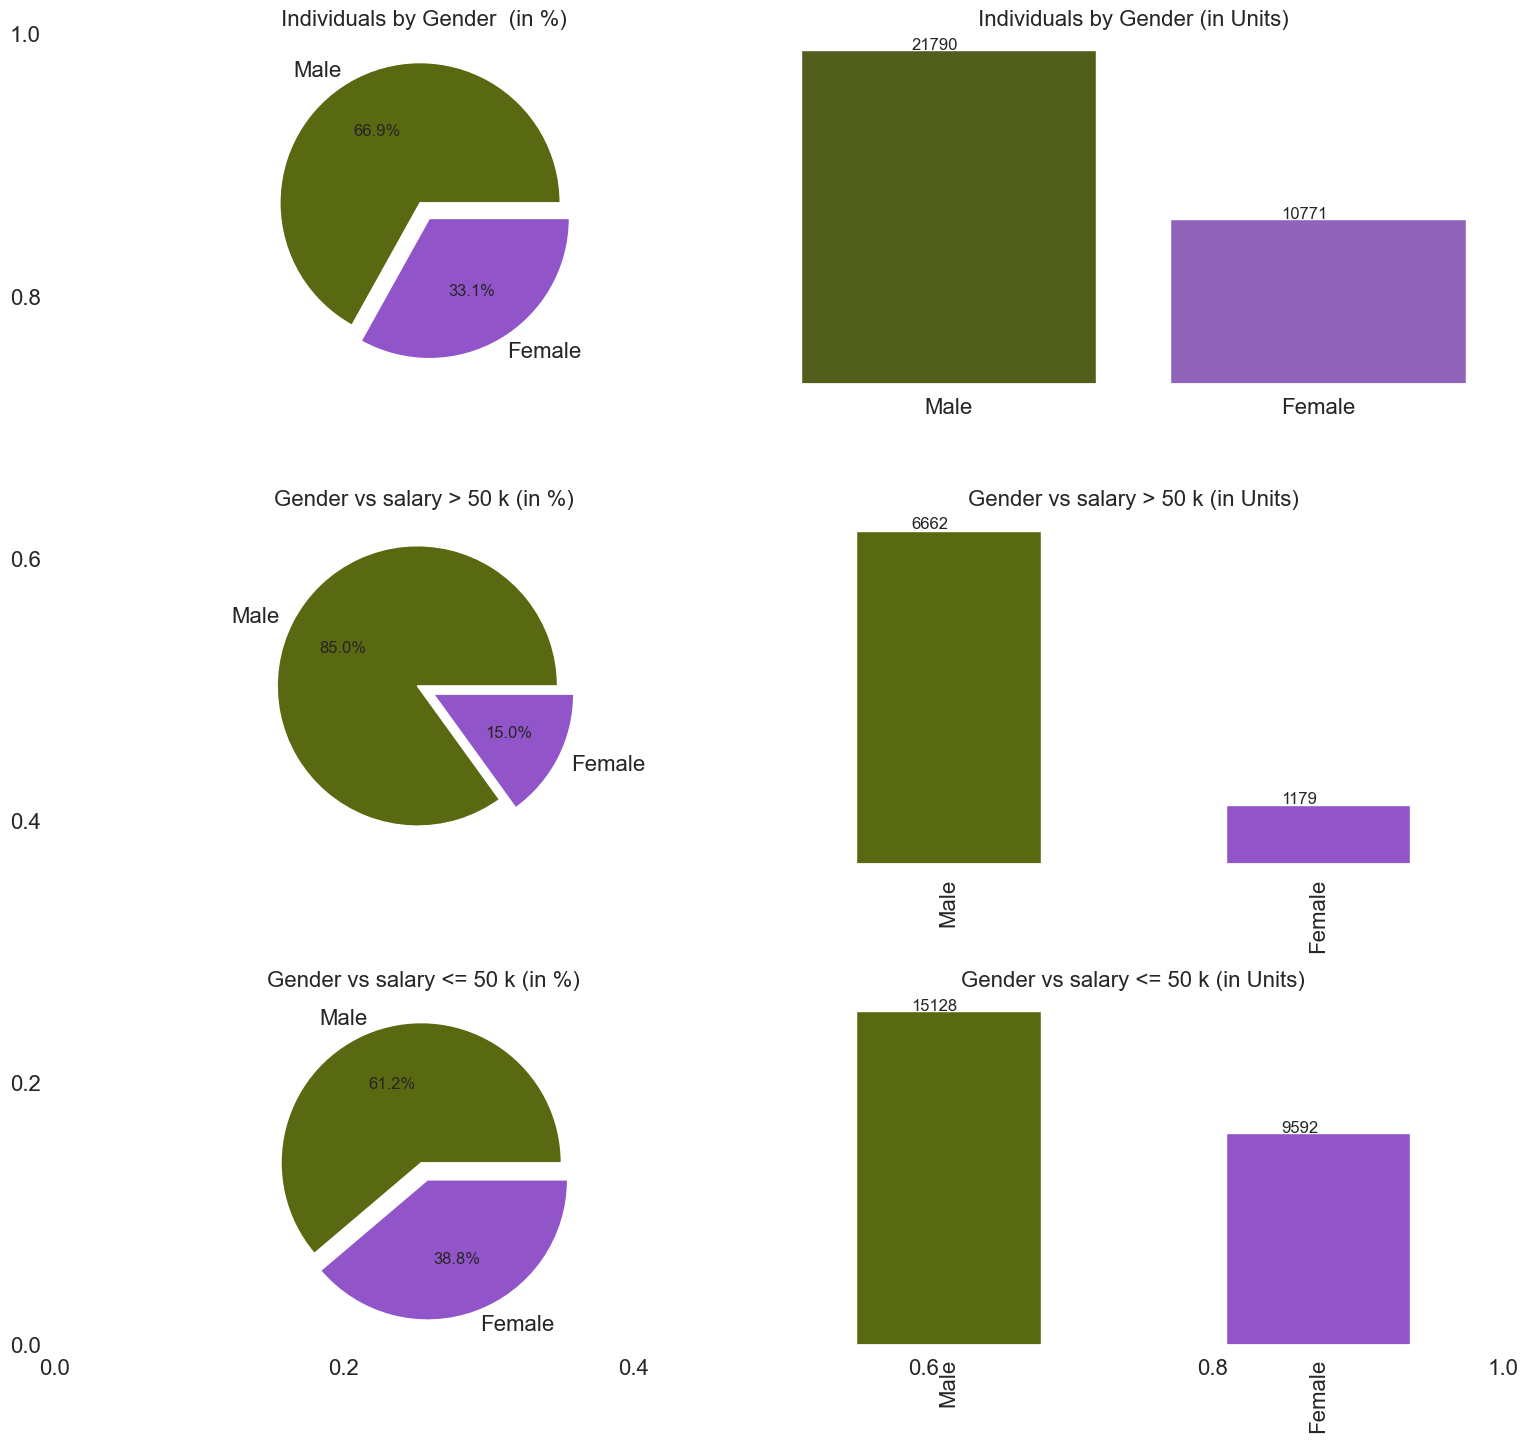

In [ ]:
# Gender VS salary

my_pal = ('#596911','#9155c9','#92b582','#1cba80', '#1ca2ba','#377dcc')
plt.subplots(figsize=(15,15))
my_xpl = [0.05, 0.08]

## Gender (in %)
plt.subplot(3,2,1)
plt.title('Individuals by Gender  (in %)', fontsize=16)
df['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

## Gender (in Units)
plt.subplot(3,2,2)
plt.title('Individuals by Gender (in Units)',fontsize=16)
ax = sns.countplot(x="sex", data=df, palette=my_pal, order=df['sex'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

## Gender > 50 k (in %)
plt.subplot(3,2,3)
plt.title('Gender vs salary > 50 k (in %)', fontsize=16)
df[df['salary']=='>50K']['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

## Gender > 50 k (in Units)
plt.subplot(3,2,4)
plt.title('Gender vs salary > 50 k (in Units)', fontsize=16)
ax = df[df['salary']=='>50K']['sex'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

## Gender < = 50 k (in %)
plt.subplot(3,2,5)
plt.title('Gender vs salary <= 50 k (in %)', fontsize=16)
df[df['salary']=='<=50K']['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')


## Gender <= 50 k (in Units)
plt.subplot(3,2,6)
plt.title('Gender vs salary <= 50 k (in Units)', fontsize=16)
ax = df[df['salary']=='<=50K']['sex'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.show()

The figures illustrate a significant discrepancy in gender vs salary, with females representing 15% of the >50k salary segment. Conversely, in the <=50k salary segment, females account for nearly 40%. This suggests a higher gender disparity in the United States, given that the country contributes to almost 90% of the total amounts.

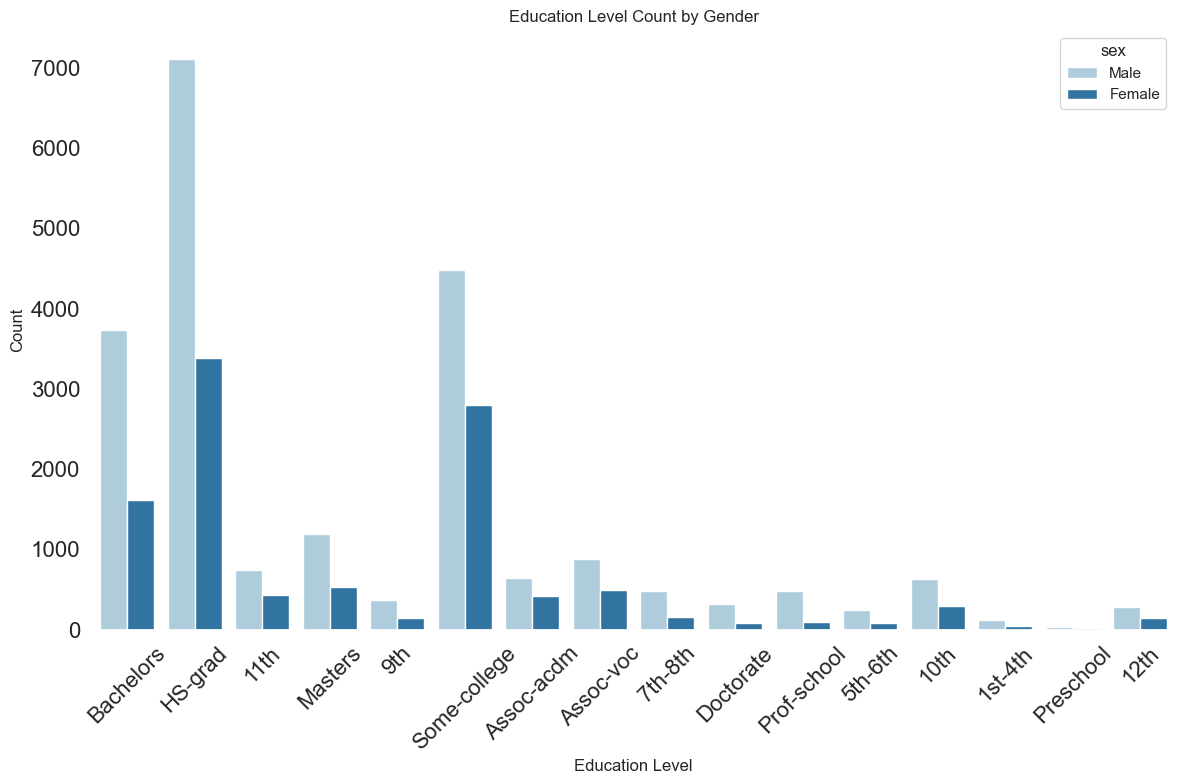

In [ ]:
# Countplot of Education Levels VS Gender( Sex)
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='education', hue='sex', palette='Paired').set(title='Education Level Count by Gender')
#plt.title('Education Level Count by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Both male and female has similar distribution of education level. HS-grad is the highest while some-college fellows behind. Bachelors holds the third position.

In [ ]:
# Sex vs age vs salary

def draw_boxen_plot(feature, hue=None):
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    sns.boxenplot(data=df, x='salary', y=feature, ax=ax, hue=hue)
    sns.set_style('whitegrid')
    ax.set_title('Salary VS '+feature.title())

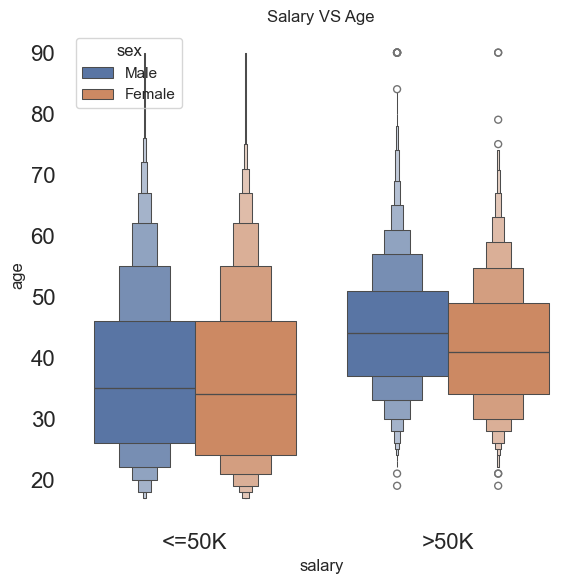

In [ ]:
draw_boxen_plot('age', 'sex')

The boxplot graph indicates that, for most females earning >50 in salary, the age tends to be younger, typically between 35 to 49, whereas for males, it falls within the range of 38 to 51. In the case of salaries <=50, the corresponding age range is between 45 to 28.

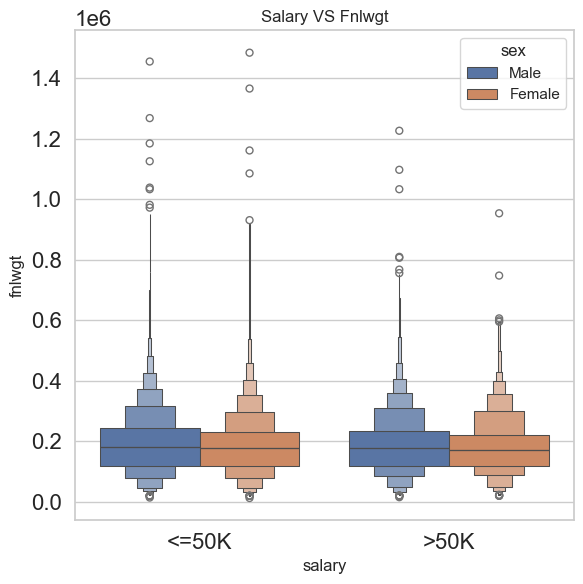

In [ ]:
draw_boxen_plot('fnlwgt', 'sex')

 <a id="18"></a>
 #### 2.3.4 Outlier Detection
 #### Interquartile Range (IQR)

 [Back to the top](#0)<a id="0"></a>

<Figure size 1000x1000 with 0 Axes>

/Users/szuyingpan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


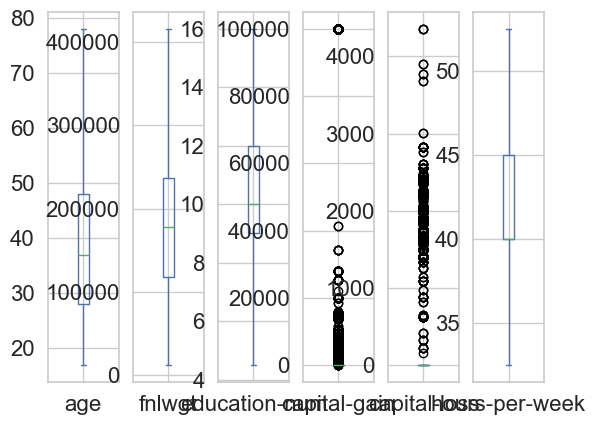

In [ ]:
def IQR(df,x):
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)
    df_skew_new = pd.DataFrame(np.where(df[x] > max_limit, max_limit, (np.where(df[x] < min_limit, min_limit, df[x]))), columns=[x])
    df=df_skew_new[x]
    return df
df['age']=IQR(df,'age')
df['fnlwgt']=IQR(df,'fnlwgt')
df['education-num']=IQR(df,'education-num')
df['hours-per-week']=IQR(df,'hours-per-week')

plt.figure(figsize=(10,10))
df.plot(kind='box',subplots=True)
plt.show()

The figure displays some notable outliers. The majority of the data points align with real-world scenarios; for example, as individuals age, they typically experience higher capital gains. Consequently, I have opted not to remove these data points at this time.

/var/folders/hp/45b34q497yb03l6tn8htgp5w0000gn/T/ipykernel_19851/1287971423.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="race", data=df, palette=my_pal, order=df['race'].value_counts().index)


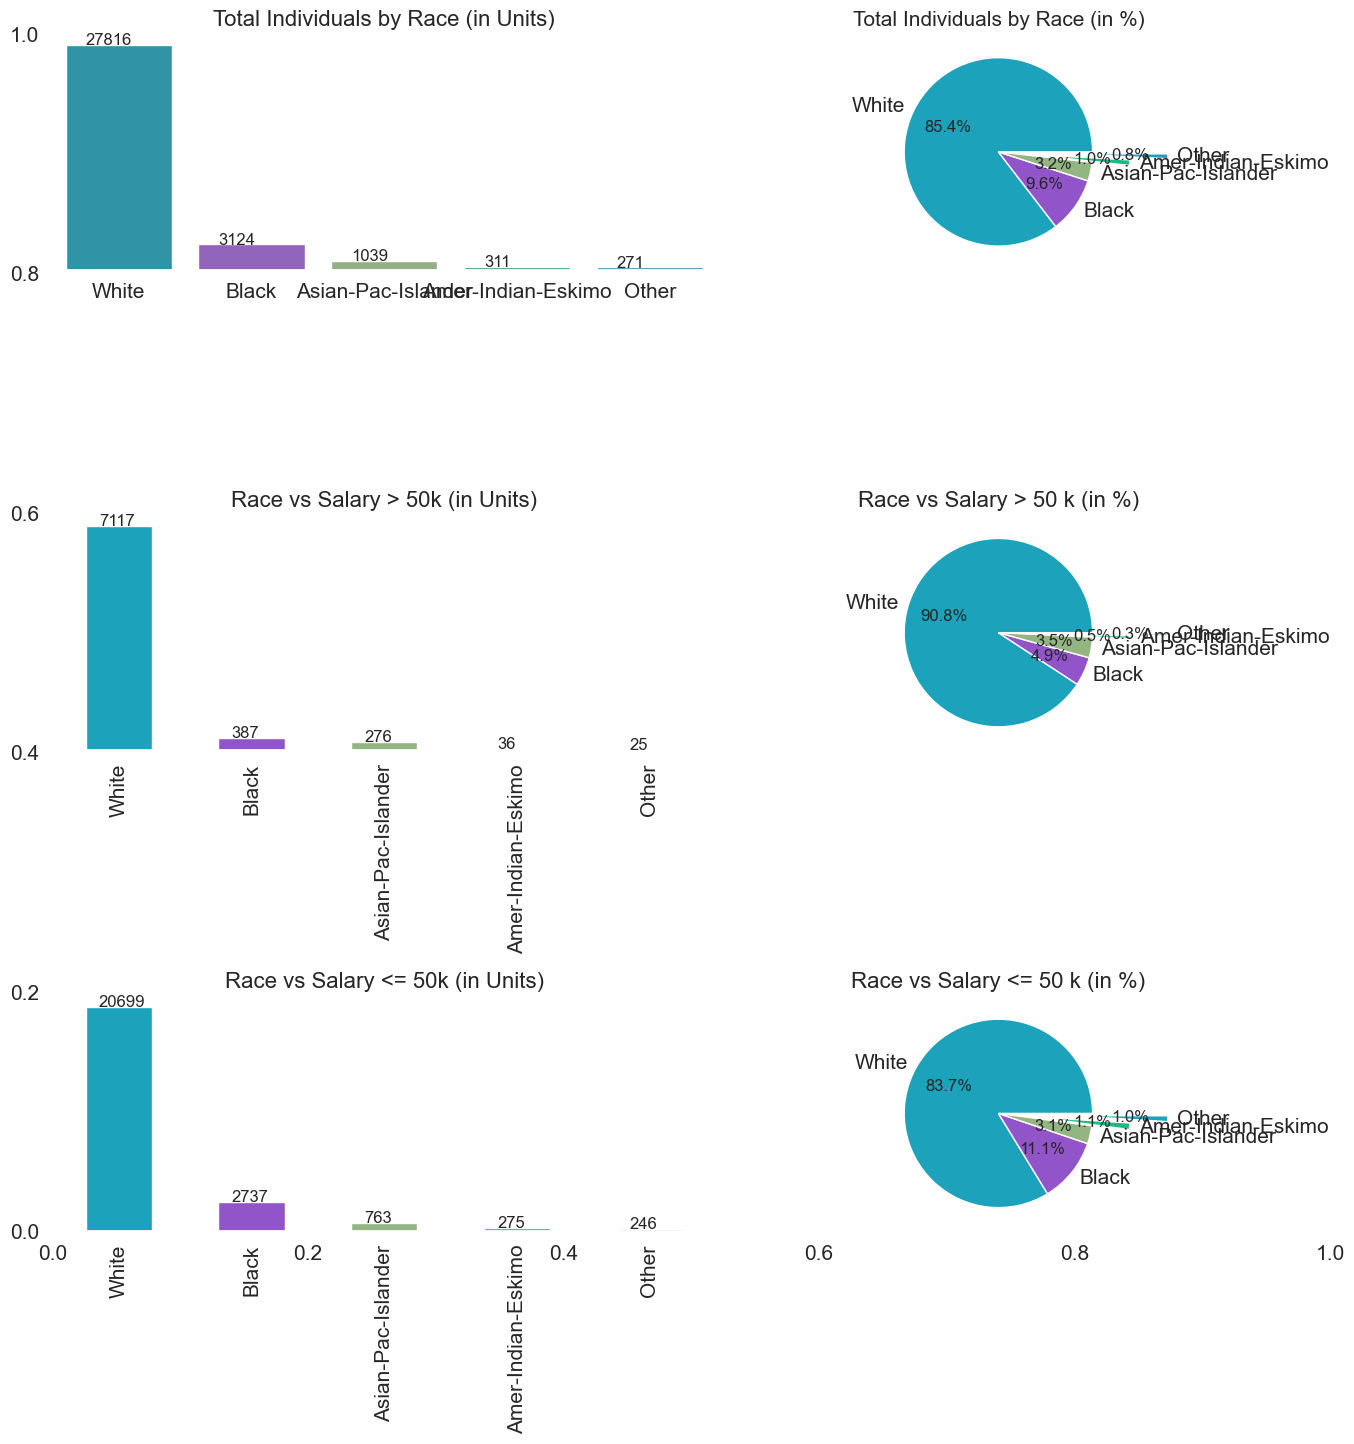

In [ ]:
## Analysis of Race feature

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':15,'ytick.labelsize':15, 'figure.autolayout':True})

plt.subplots(figsize=(15,15))
my_xpl = [0, 0, 0, 0.4, 0.8]
my_pal = ('#1ca2ba','#9155c9','#92b582','#1cba80', '#1ca2ba','#377dcc','#596911')

## race total (in Units)
plt.subplot(3,2,1)
plt.title('Total Individuals by Race (in Units)', fontdict={'fontsize':16})
ax = sns.countplot(x="race", data=df, palette=my_pal, order=df['race'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+25))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

## race by salary (in Units)
plt.subplot(3,2,2)
plt.title('Total Individuals by Race (in %)', fontdict={'fontsize':15})
df['race'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', explode=my_xpl, autopct='%1.1f%%')
## race by salary > 50 k (in %)
plt.subplot(3,2,3)
plt.title('Race vs Salary > 50k (in Units)', fontdict={'fontsize':16})
ax = df[df['salary']=='>50K']['race'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

## race by salary  > 50 k (in %)
plt.subplot(3,2,4)
plt.title('Race vs Salary > 50 k (in %)', fontdict={'fontsize':16})
df[df['salary']=='>50K']['race'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', explode=my_xpl,  autopct='%1.1f%%')

## race by salary < = 50 k (in Units)
plt.subplot(3,2,5)
plt.title('Race vs Salary <= 50k (in Units)', fontdict={'fontsize':16})
ax = df[df['salary']=='<=50K']['race'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

## race by salary < = 50 k (in %)
plt.subplot(3,2,6)
plt.title('Race vs Salary <= 50 k (in %)', fontdict={'fontsize':16})
df[df['salary']=='<=50K']['race'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', explode=my_xpl, autopct='%1.1f%%')

plt.show()

Regarding to race, white people dominate the table with a share exceeding 85% of the total number of salaried individuals. Moreover, in the >50k salary category, white people hold a share above 90%. The proportion for Asian people remains consistent, accounting for around 3.5% and 3.1%, respectively.

Text(0.5, 1.0, 'Workclass VS Salary')

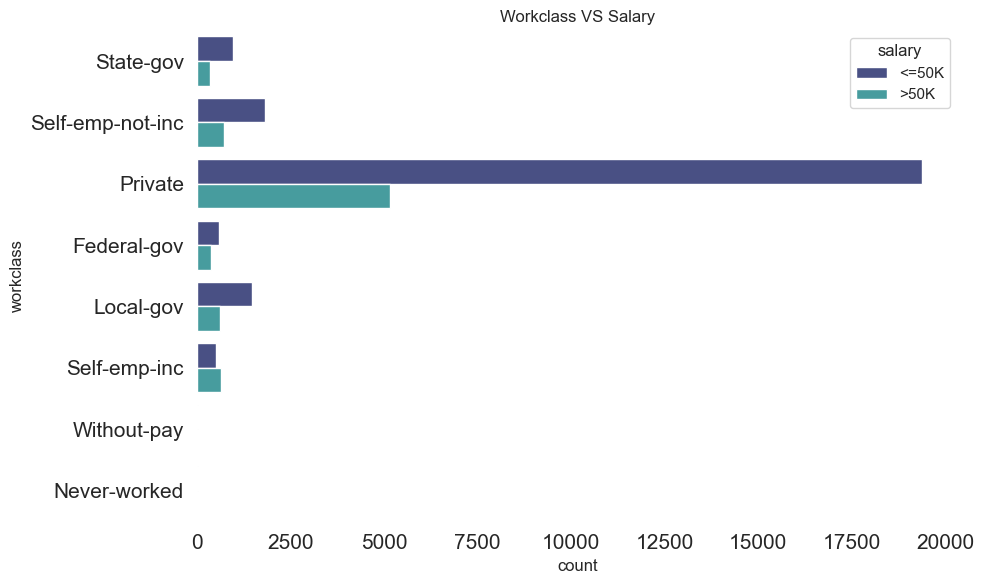

In [ ]:
# Workclass VS Salary

fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df,y='workclass', hue='salary', palette='mako')
ax.set_title('Workclass VS Salary')

Compared to individuals in other work classes, those employed in the private sector have greater opportunities to earn an annual income exceeding 50K. An interesting observation to highlight is that, among the various work classes, only in Self-emp-inc is the number of individuals earning <=50K higher than those earning less 50K.

Text(0.5, 1.0, 'Marital-status VS Salary')

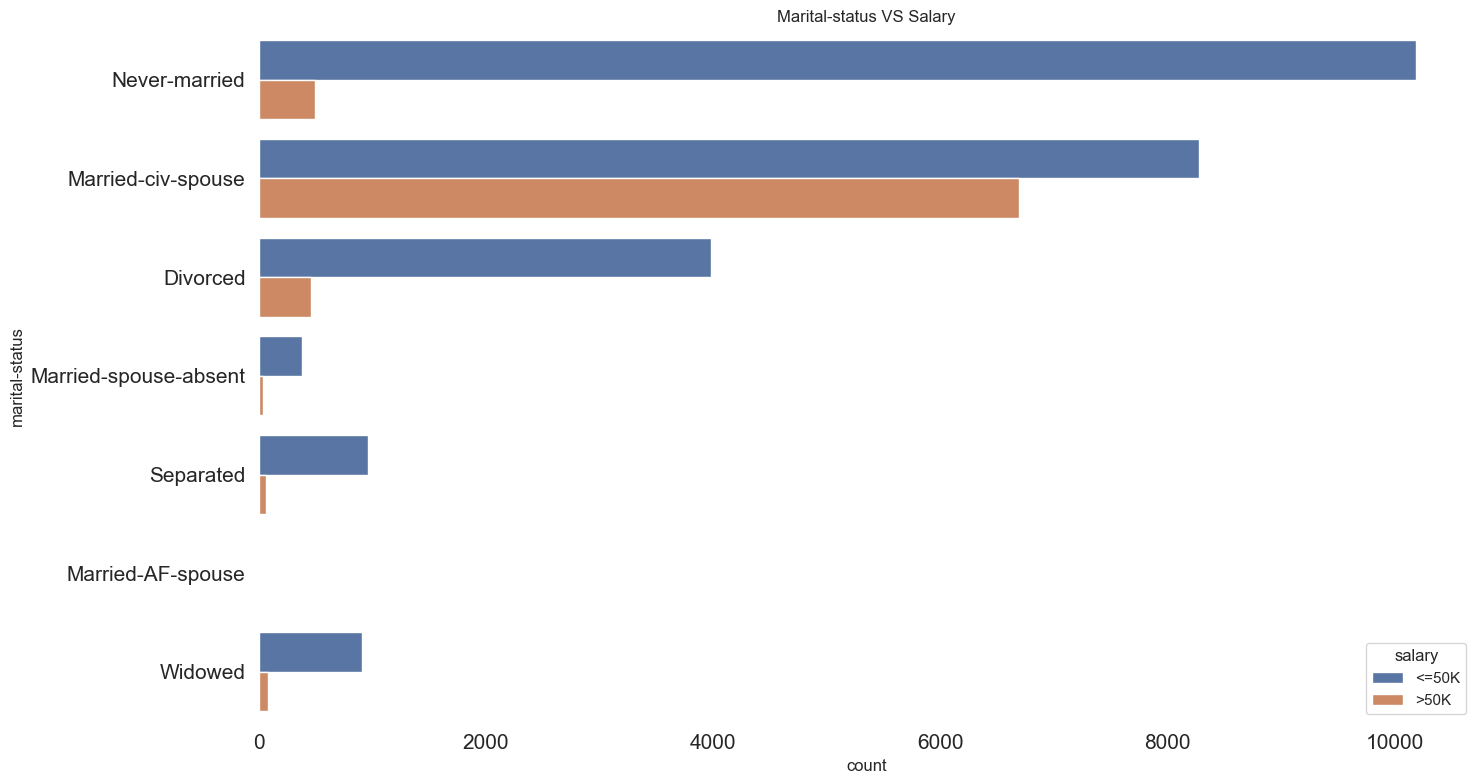

In [ ]:
# Marital-status VS Salary
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df,y='marital-status', hue='salary')
sns.set_palette('Accent_r')
ax.set_title('Marital-status VS Salary')

People who married-civ-spouse has the higest income, whereas those categorized as "never-married" or "devoice" tend to have lower income

[Text(0.5, 1.0, 'Relationship VS Gender')]

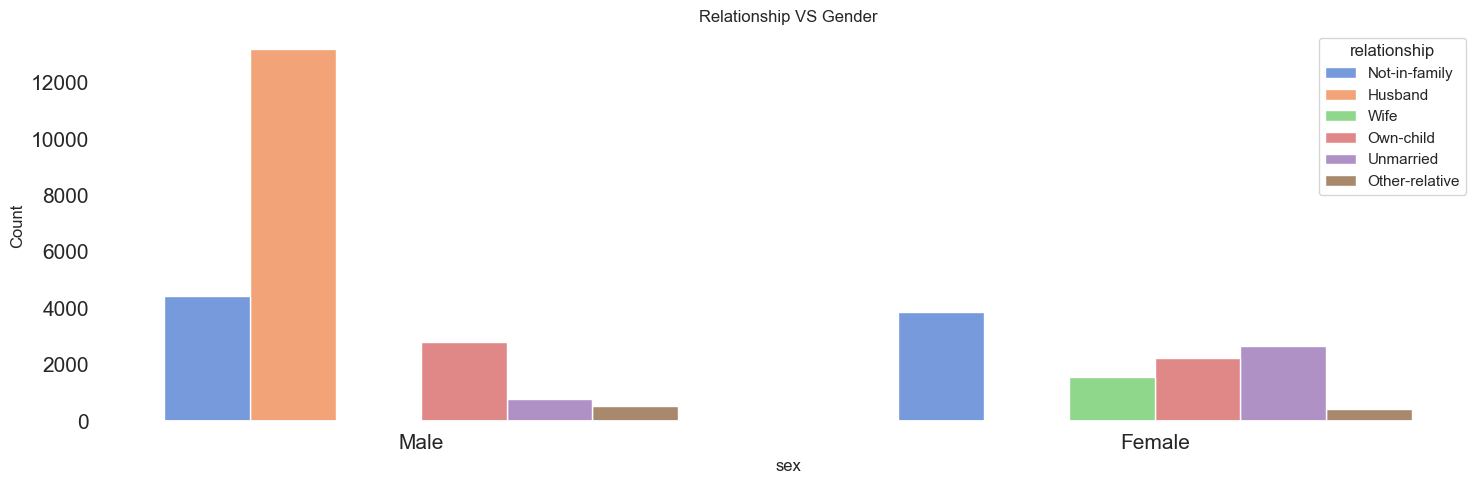

In [ ]:
# Compare male and female salary regarding to relationship

plt.figure(figsize=(15,5))
sns.histplot(data=df, x="sex", shrink=.7, multiple='dodge', hue='relationship', palette='muted').set(title='Relationship VS Gender')

The majority male relationship is husband. On the other hand, the majority female are not-in-family or unmarried.

<a id="14"></a>
 ### 2.4 Data Pre-processing

[Back to the top](#0)<a id="0"></a>

In [ ]:
def crosstab_counts(feature, normalize=False):
    return pd.crosstab(
        index=df[feature],
        columns='Counts(%)',
        normalize=normalize
    ).apply(lambda x: round(x*100, 4)).sort_values(by='Counts(%)', ascending=False)

In [ ]:
# education counts

crosstab_counts('education', True)

col_0,Counts(%)
education,
HS-grad,32.2502
Some-college,22.3918
Bachelors,16.4461
Masters,5.2916
Assoc-voc,4.2443
11th,3.6086
Assoc-acdm,3.2769
10th,2.8654
7th-8th,1.9840


In [ ]:
# race counts

crosstab_counts('race', True).T

race,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
col_0,,,,,
Counts(%),85.4274,9.5943,3.1909,0.9551,0.8323


In [ ]:
# Sex vs salary

pd.crosstab(
    index=df['salary'],
    columns=df['sex'],
    margins=True,
    normalize=True
)

sex,Female,Male,All
salary,,,
<=50K,0.294586,0.464605,0.75919
>50K,0.036209,0.204601,0.24081
All,0.330795,0.669205,1.00000


In [ ]:
# Race vs salary

pd.crosstab(
    index=df['salary'],
    columns=df['race'],
    margins=True,
    normalize=True
)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
salary,,,,,,
<=50K,0.008446,0.023433,0.084058,0.007555,0.635699,0.75919
>50K,0.001106,0.008476,0.011885,0.000768,0.218574,0.24081
All,0.009551,0.031909,0.095943,0.008323,0.854274,1.00000


In [ ]:
# Relationship vs salary

pd.crosstab(
    index=df['salary'],
    columns=df['relationship'],
    margins=True,
    normalize=True
)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
salary,,,,,,,
<=50K,0.223427,0.228771,0.028992,0.153589,0.099137,0.025276,0.75919
>50K,0.181751,0.026289,0.001136,0.002058,0.006695,0.022880,0.24081
All,0.405178,0.255060,0.030128,0.155646,0.105832,0.048156,1.00000


In [ ]:
# Marital-status vs salary

pd.crosstab(
    index=df['marital-status'],
    columns=df['sex'],
    margins=True
)

sex,Female,Male,All
marital-status,,,
Divorced,2672,1771,4443
Married-AF-spouse,14,9,23
Married-civ-spouse,1657,13319,14976
Married-spouse-absent,205,213,418
Never-married,4767,5916,10683
Separated,631,394,1025
Widowed,825,168,993
All,10771,21790,32561


In [ ]:
# Sex vs salary

pd.crosstab(
    index=df['salary'],
    columns=df['sex'],
    margins=True
)

sex,Female,Male,All
salary,,,
<=50K,9592,15128,24720
>50K,1179,6662,7841
All,10771,21790,32561


In [ ]:
# Sex vs occupation

pd.crosstab(
    index=df['occupation'],
    columns=df['sex'],
    margins=True
)

sex,Female,Male,All
occupation,,,
Adm-clerical,2537,1233,3770
Armed-Forces,0,9,9
Craft-repair,1063,4879,5942
Exec-managerial,1159,2907,4066
Farming-fishing,65,929,994
Handlers-cleaners,164,1206,1370
Machine-op-inspct,550,1452,2002
Other-service,1800,1495,3295
Priv-house-serv,141,8,149


In [ ]:
LE=LabelEncoder()
df=df.apply(LE.fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  salary          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


<Axes: >

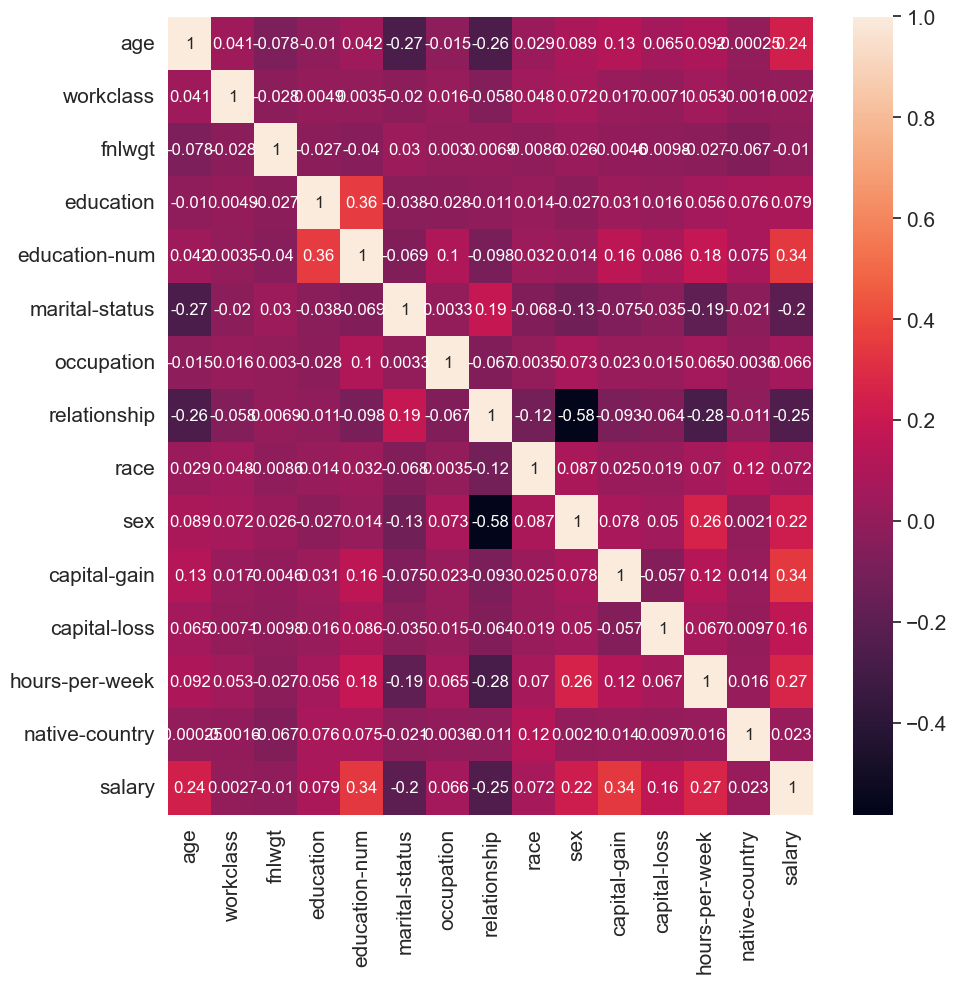

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In general, salary is correlated with age, education-num, capital-gain, capital-loss, sex, and hours-per-week. Sex is also correlated with salary and hours-per-week. Additionally, education is correlated with education-num.

<a id="19"></a>
 ### 2.4.1 Normalise dataset

 [Back to the top](#0)<a id="0"></a>

In [ ]:
# normalize_val takes numeric features normalized into 0 ~ 1

def normalize_val(dataset, val_name):
    dataset[val_name] = dataset[val_name] / dataset[val_name].max()
    return dataset

In [ ]:
# one_hot_val takes categorical features and one-hot encode them

def one_hot_val(dataset, val_name):
    val_one_hot = pd.get_dummies(dataset[val_name], prefix=f"{val_name}=", prefix_sep="")
    dataset = pd.concat([dataset, val_one_hot], axis=1)
    dataset = dataset.drop([val_name], axis=1)
    return dataset

In [ ]:
# binary_encode takes categorical features with only two possible values and replaces them with either 1 or 0

def binary_encode_val(dataset, val_name, new_name):
    unique_values = dataset[val_name].unique()
    replace_nums = {val_name: {unique_values[0]: 0, unique_values[1]: 1}}
    dataset = dataset.replace(replace_nums)
    dataset.columns = dataset.columns.str.replace(val_name, new_name)
    return dataset

In [ ]:
# Split features into numerial, categorial and binary

numerical_val = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_val = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country"]
binary_val = ["sex", "salary"]


In [ ]:
new_names = ["is_female", "salary_greater_than_50k"]

In [ ]:
for val in numerical_val:
    df = normalize_val(df, val)

In [ ]:
for i, val in enumerate(binary_val):
    df = binary_encode_val(df, val, new_names[i])

<Axes: >

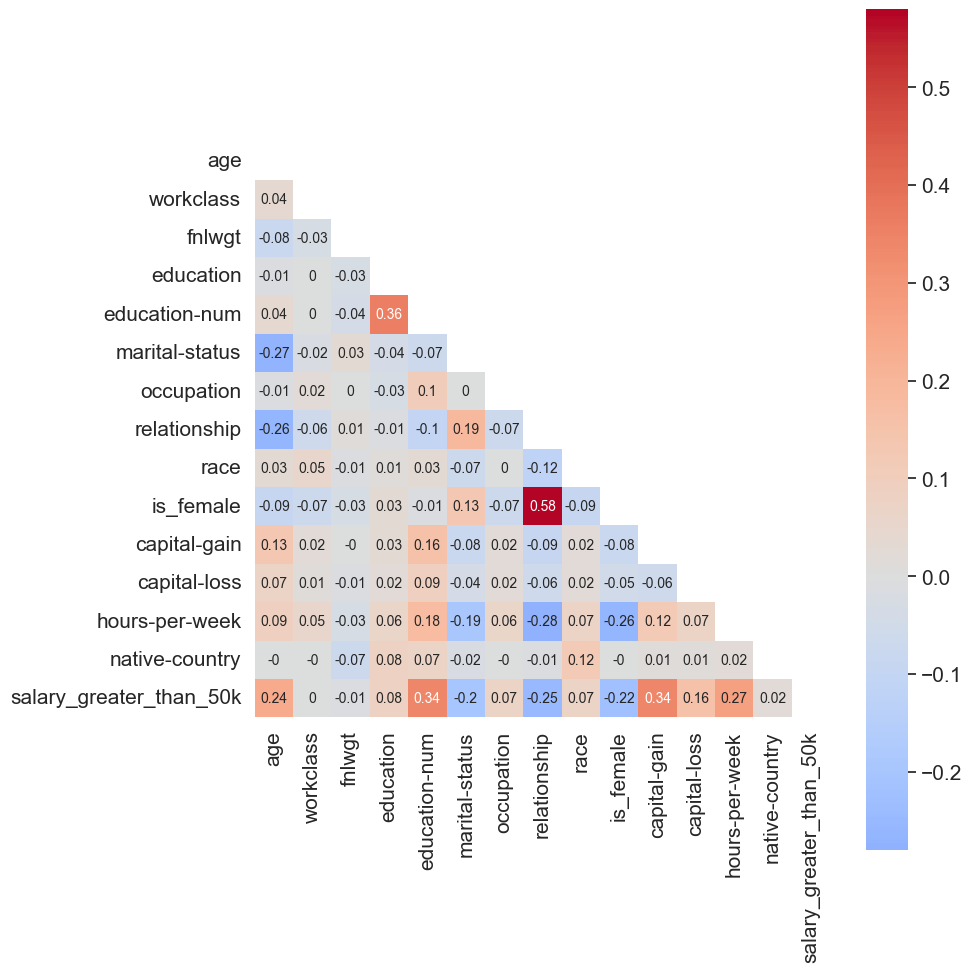

In [ ]:
# Use heatmap to check the correlation again

plt.figure(figsize=[10,10])
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(df.corr(),2), mask=mask, center=0, square=True, annot=True, annot_kws={"size":10}, cmap=cm.coolwarm)

In the figure, it's evident that the strongest correlation exists between the variables "relationship" and "is_female," measuring at 0.58. Additionally, there is a correlation of 0.36 between "education-num" and "education." "Education-num" is also correlated with the variable "salary_greater_than_50k." Moreover, "salary_greater_than_50k" shows correlations with "age," "capital-gain," "capital-loss," and "hours-per-week." A column that will be dropped later is "fnlwgt" due to its lack of contribution to training the datasets.

In [ ]:
for val in categorical_val:
    df = one_hot_val(df, val)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 105 entries, age to native-country=40
dtypes: bool(97), float64(6), int64(2)
memory usage: 5.0 MB


##### Split dataset in test/train


In [ ]:
x = df["salary_greater_than_50k"]
y = df.drop(["salary_greater_than_50k","fnlwgt"], axis=1)
input_shape = y.shape

In [ ]:
SEED = 0
x_train, x_test, y_train, y_test = train_test_split(y, x, test_size=0.20, random_state=SEED)

In [ ]:
### Check for imblanced data

# Check class distribution
class_distribution = y_train.value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
salary_greater_than_50k
0    19802
1     6246
Name: count, dtype: int64


In [ ]:
# Check the imbalance ratio (ratio of the majority class to the minority class)
imbalance_ratio = class_distribution[0] / class_distribution[1]
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 3.17034902337496


In [ ]:
# Apply SMOTE to solve the imblanced data

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

threshold = 2
if imbalance_ratio > threshold:
    # Initialize SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Fit and apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

 # Check the class distribution after SMOTE
    resampled_class_distribution = y_train_resampled.value_counts()
    print("\nClass Distribution After SMOTE:")
    print(resampled_class_distribution)

    # Update the training data with the resampled data
    X_train = X_train_resampled
    y_train = y_train_resampled
    print("\nSMOTE Applied. Training data resampled.")
else:
    print("\nNo significant class imbalance. SMOTE not applied.")



Class Distribution After SMOTE:
salary_greater_than_50k
0    19802
1    19802
Name: count, dtype: int64

SMOTE Applied. Training data resampled.


<a id="3"></a>
 ## 3. Modeling

[Back to the top](#0)<a id="0"></a>

<a id="20"></a>
 ### 3.1 Random Forest

 [Back to the top](#0)<a id="0"></a>

In [ ]:
#Create a Random Forest Classifier with specified parameters
rf = RandomForestClassifier(n_estimators=5000, random_state=SEED, verbose=1)

# Fit the Random Forest Classifier to the training data
rf = rf.fit(X_train, y_train)
rf.verbose = 0

# Predict on the test set
y_pred = rf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Model Accuracy:", accuracy)
print("Classification Report:\n", report)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   20.8s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   33.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:   47.7s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:  2.2min


Random Forest Model Accuracy: 0.8398587440503608
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4918
           1       0.66      0.71      0.68      1595

    accuracy                           0.84      6513
   macro avg       0.78      0.80      0.79      6513
weighted avg       0.84      0.84      0.84      6513



[[4342  576]
 [ 467 1128]]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

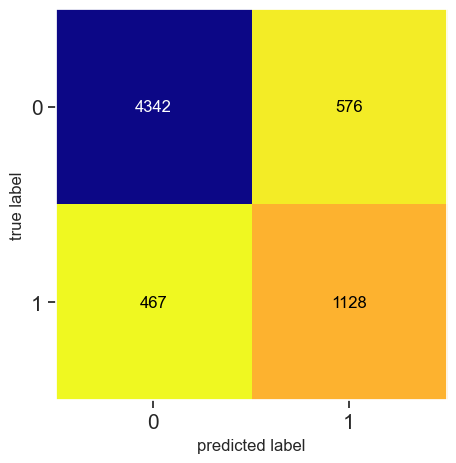

In [ ]:
rf_con = confusion_matrix(y_test, y_pred )
print(rf_con)
plot_confusion_matrix(rf_con,cmap='plasma_r')

<a id="21"></a>
 ### 3.2 XGBoost

 [Back to the top](#0)<a id="0"></a>

In [ ]:
# Create an XGBoost Classifier with specified parameters
import xgboost as xgb

xgb = xgb.XGBClassifier(
    random_state=42,
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic'
)

In [ ]:
# Fit the XGBoost Classifier to the training data
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

XGBoost Model Accuracy: 0.8218946721940734
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      4918
           1       0.60      0.85      0.70      1595

    accuracy                           0.82      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.86      0.82      0.83      6513



[[3997  921]
 [ 239 1356]]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

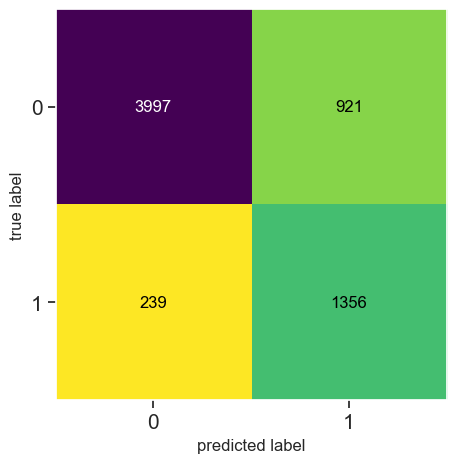

In [ ]:
xgb_con = confusion_matrix(y_test, y_pred )

print(xgb_con)
plot_confusion_matrix(xgb_con,cmap='viridis_r')

<a id="22"></a>
 ### 3.3 Gradient Boosting

[Back to the top](#0)<a id="0"></a>

In [ ]:
# Create a GradientBoostingClassifier with specified parameters
gb = GradientBoostingClassifier(
    random_state=42,
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100
)

# Fit the GradientBoostingClassifier to the training data
gb.fit(X_train, y_train)

# Predict on the test set
y_pred = gb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("GradientBoosting Model Accuracy:", accuracy)
print("Classification Report:\n", report)

GradientBoosting Model Accuracy: 0.8258866881621373
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      4918
           1       0.61      0.83      0.70      1595

    accuracy                           0.83      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.86      0.83      0.83      6513



[[4051  867]
 [ 267 1328]]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

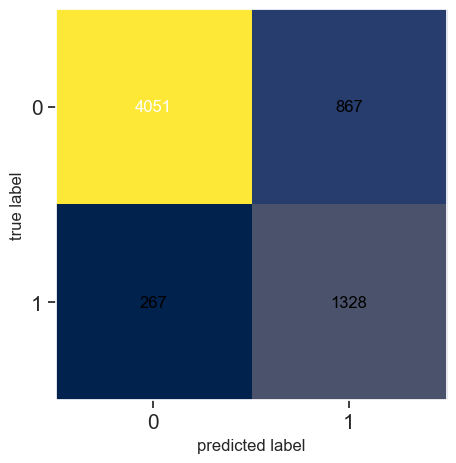

In [ ]:
gb_con = confusion_matrix(y_test, y_pred )

print(gb_con)
plot_confusion_matrix(gb_con,cmap='cividis')

<a id="23"></a>
 ### 3.4 K-nearest Neighbour

 [Back to the top](#0)<a id="0"></a>

/Users/szuyingpan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/szuyingpan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/szuyingpan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/szuyingpan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

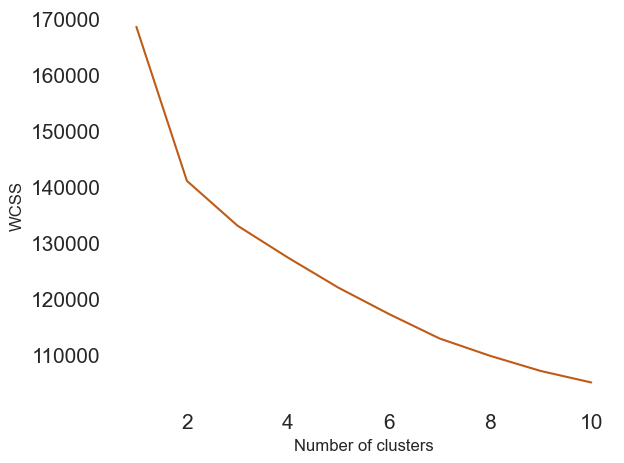

In [ ]:
# Use elbow method to find the optimal k-value
X = X_train.iloc[:,:].values

# Within cluster sum of squares
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The elblow method suggests k-value 2 is the optimal.

In [ ]:
#Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 2)

# Fit the KNN Classifier to the training data
knn.fit(X_train,y_train)

# Predict on the test set
y_pred = knn.predict(x_test)
con = confusion_matrix(y_test, y_pred )

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("KNN Model Accuracy:", accuracy)
print("Classification Report:\n", report)

# If K=3, the accurancy is about 0.80

KNN Model Accuracy: 0.8132964839551666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4918
           1       0.65      0.51      0.57      1595

    accuracy                           0.81      6513
   macro avg       0.75      0.71      0.73      6513
weighted avg       0.80      0.81      0.81      6513



[[4480  438]
 [ 778  817]]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

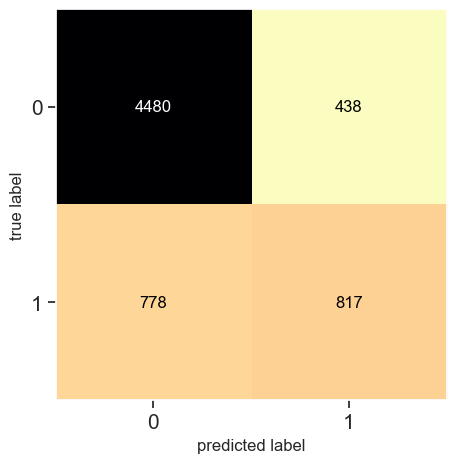

In [ ]:
knn_con = confusion_matrix(y_test, y_pred )

print(knn_con)
plot_confusion_matrix(knn_con,cmap='magma_r')

The Accuracy of Random Forest:0.84
The Accuracy of XGBoost:0.82
The Accuracy of Gradient Boosting: 0.83
the Accuracy of KNN: 0.81

<a id="24"></a>
 ### 3.4 Measure Algorithem Performance

 [Back to the top](#0)<a id="0"></a>

<a id="25"></a>
 #### 3.4.1 ROC Curve

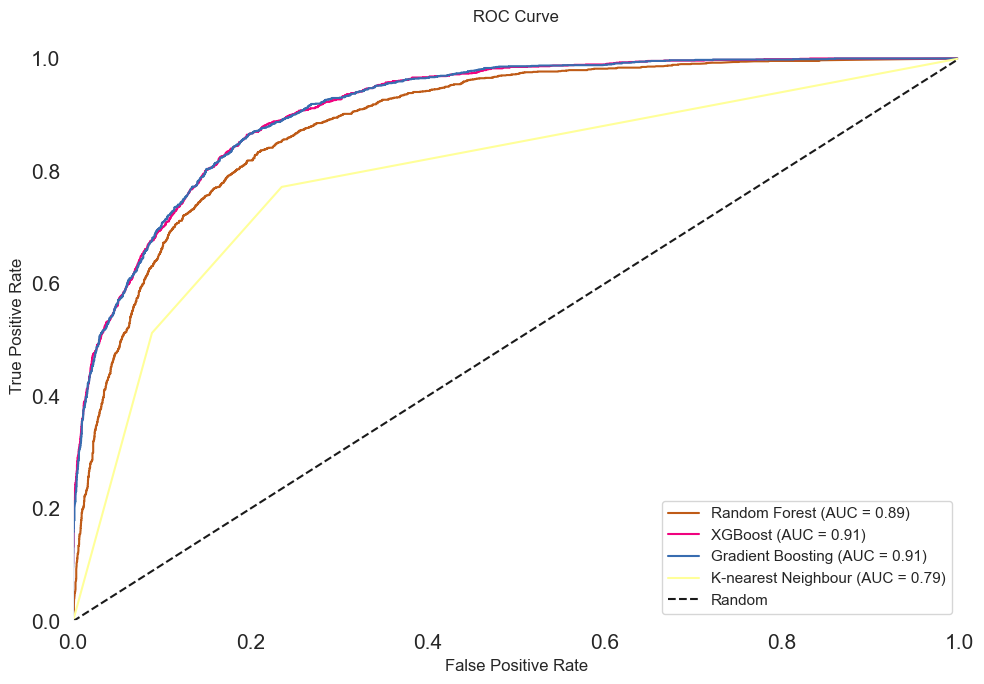

In [ ]:
#### Define a list of classifiers and their names
classifiers = [rf, xgb, gb, knn]
classifier_models = ["Random Forest", "XGBoost", "Gradient Boosting","K-nearest Neighbour"]

# Create a function to plot ROC curve and calculate AUC
from matplotlib.pyplot import figure

def plot_roc_curve_and_auc(classifiers, classifier_models, x_test, y_test):
    plt.figure(figsize=(10, 7))
    for classifier, name in zip(classifiers, classifier_models):
        y_pred_prob = classifier.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for all classifiers
plot_roc_curve_and_auc(classifiers, classifier_models, x_test, y_test)

Both the models of XGBoost and Gradient Boosting outperform the other two models in terms of both accuracy and AUC. It demonstrates a good balance between precision and recall for both classes, indicating that it performs well in correctly classifying both positive and negative instances.

<a id="4"></a>
 ## 4. Finding and interpretation

[Back to the top](#0)<a id="0"></a>

1. It is interesting to observe a notable rise in working hours from the age of 20 to 30. Between the ages of 30 and 60, the working hours stabilize at around 45 hours. Beyond the age of 60, there is a gradual decline, with a particularly dramatic fluctuation from ages 80 to 90. At age 87, working hours sharply decrease to approximately 3 hours, followed by a sharp peak at 40 hours, and subsequent decrease.
2. There are very few women having an income of greater than 50k in comparison with men.
3. The dataset demonstrates that the United States occupies the majority of countries, and males is the highest proportion. However, it also reveals a potential bias if we aim to derive results from more diverse countries.
4. US has a higher percentage of individuals earning over 50k, standing at approximately 24%, aligning closely with the overall share. For the US individuals, regarding the salary, it is obvious to mention that the dataset is highly imbalanced as over 75% of the records belong to <=50k salary segment.
5. The boxplot graph indicates that, for most females earning >50 in salary, the age tends to be younger, typically between 35 to 49, whereas for males, it falls within the range of 38 to 51. In the case of salaries <=50, the corresponding age range is between 45 to 28.
6. Regarding to race, white people dominate the table with a share exceeding 85% of the total number of salaried individuals. Moreover, in the >50k salary category, white people hold a share above 90%. The proportion for Asian people remains consistent, accounting for around 3.5% and 3.1%, respectively.
7. People who married-civ-spouse has the higest income, whereas those categorized as "never-married" or "devoice" tend to have lower income.
8. The majority male relationship is husband. On the other hand, the majority female are not-in-family or unmarried.
9. In general, salary is correlated with age, education-num, capital-gain, capital-loss, sex, and hours-per-week. Sex is also correlated with salary and hours-per-week. Additionally, education is correlated with education-num.
10. In the figure, it's evident that the strongest correlation exists between the variables "relationship" and "is_female," measuring at 0.58. Additionally, there is a correlation of 0.36 between "education-num" and "education." "Education-num" is also correlated with the variable "salary_greater_than_50k." Moreover, "salary_greater_than_50k" shows correlations with "age," "capital-gain," "capital-loss," and "hours-per-week." A column that will be dropped later is "fnlwgt" due to its lack of contribution to training the datasets.

<a id="5"></a>
 ## 5. Conclusion/ Project Limitations

[Back to the top](#0)<a id="0"></a>

It is noteworthy to mention that the dataset initially demonstrates bias concerning nationality, gender, and race, which deviates from the expected diversity in the data source. Regarding to the findings, white males have higher salaries, despite both males and females having similar education in the US. Marital status reveals that individuals who are married tend to have higher salaries.

The XGBoost and Gradient Boosting models surpass the Random Forest model and KNN model in both accuracy and AUC. They demonstrate a good balance between precision and recall for both classes, showcasing proficiency in correctly classifying positive and negative instances. The higher AUC score also suggests that have a better ability to distinguish between the two classes.

In conclusion, considering the comprehensive performance metrics and weighing factors of speed and efficiency, the XGBoost and Gradient Boosting models emerge as the top-performing models for this classification task.



<a id="6"></a>
 ## 6. References

[Back to the top](#0)<a id="0"></a>

* Li Zhe. (04 November, 2010). Research on pay equity and organization efficiency of compensation administration[Online]. Available: https://ieeexplore.ieee.org/document/5657578

* Madinah F. Hamidullah and Norma M. Riccucci. ( 12 February, 2020) Public Management Review: Citizens’ perceptions of closing the gender pay gap: an experimental study [Online]. Available: https://www.tandfonline.com/doi/full/10.1080/14719037.2020.1722207

<a id="7"></a>
 ## 7. Resources Used

[Back to the top](#0)<a id="0"></a>

* Barry Becker. Census Income Dataset[Online]. Available: https://archive.ics.uci.edu/dataset/20/census+income

* University of Kent. The 100 Year Timeline of Gender Pay Inequality[Onlie]. Available:
https://www.postgraduatestudentships.co.uk/news/the-100-year-timeline-of-gender-pay-inequality/154902/

* Jason Brownlee. (20 August, 2020). Machine Learning Mastery.How to Choose a Feature Selection Method For Machine Learning[Online].Available: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

* Scikit Learn. Feature Selection[online]. https://scikit-learn.org/stable/modules/feature_selection.html

* Stackflow, Finding Median list in Python[online]. https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python

* note.nkmk.me. (2 August, 2023). pandas: Detect and count NaN (missing values) with isnull(), isna()[online]. https://note.nkmk.me/en/python-pandas-nan-judge-count/

* Jason Brownlee. (17 March, 2022). Machine Learning Mastery. Smote for imblanacing data[online]. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
  
* Basil Saji. (21st Sept, 2023). Elbow Method for finding the optimal number of cluster in K-means[online]. https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/